<h1>Sales 10 Group</h1>
<ul> Members:
    <li>Angelica Sullano</li>
    <li>Edmund Magno Jr.</li>
    <li>Monette Soriano</li>
    <li>Ryan Talatagod</li>
    <li>Tristan Josh Yangco</li>
</ul>

<h1>CEBU Air Inc.</h1>
<p>Source: https://ph.investing.com/equities/cebu-air-inc-historical-data</p>
    
<h2>Introduction</h2>

<p>Stock trading is one of the most popular trading platform for traders to invest. It is already a pre-concieved notion that
    traders must have a capital before trading in stocks because it will be used for betting. Stock trading is relatively 
    similar to gambling because traders won't be able to predict when will the stock price go up or go down as it closes while
    the risks are high, and the earnings may be lower. Prices are extremely volatile and may be affected by external factors 
        such as financial, regulatory or political events. 
    
<p>Cebu Air Inc. is an airline company which operates international and domestic flights. The company serves over 60 domestic routes and 40 for the international routes with approximately 2,685 weekly scheduled flights. It operates for over 7 hubs across the country with a fleet of over 50 aircraft, which consists of approximately eight Airbus A319, over 33 Airbus A320, approximately eight ATR 72-500 and over six Airbus A330 aircraft.</p>

<p>The team's objective is to provide insights to new traders in Cebu that wants to invest in Cebu Air Inc., introduce a strategy that will gauge opportunities in the company stocks, pinpoint the risks in trading based on the given data, and stock prediction through Multiple Regression, and Decision Trees, and observe its efficiency. Predictions will come after introducing a strategy, and its risks so that traders will not be given a false sense of security in their capital once they bet in the company's stock. </p>

<h1>Importation of libraries</h1>

<p>In order to analyze the data, all appropriate libraries must be imported like pandas as it will play a vital role for data preprocessing, numpy to control an array of observations, matplotlib for plotting all points derived from the results of computation, and emphasize the dates within the plot. Seaborn was also used to visualize the data for correlations with a trader-friendly visuals.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

cebu_airline_datetime_format = mdates.DateFormatter('%d/%m/%y')

In [2]:
cebu = pd.read_csv(r'CEB Historical Data.csv')
cebu

,Date,Price,Open,High,Low,Vol.,Change %
0,18-Jun-18,80.00,84.50,84.50,79.00,245.62K,-5.33%
1,19-Jun-18,79.50,82.00,82.00,79.00,64.22K,-0.63%
2,20-Jun-18,81.90,81.90,81.90,81.00,23.08K,3.02%
3,21-Jun-18,80.00,81.80,81.80,79.50,121.39K,-2.32%
4,22-Jun-18,79.15,80.05,80.85,79.00,69.46K,-1.06%
...,...,...,...,...,...,...,...
662,8-Mar-21,45.90,45.20,48.10,45.00,666.00K,2.00%
663,9-Mar-21,45.60,45.00,46.00,43.25,300.50K,-0.65%
664,10-Mar-21,46.85,45.60,47.10,44.90,474.90K,2.74%
665,11-Mar-21,47.20,46.85,47.50,46.00,333.50K,0.75%


### Variables:

<html>
<body>
<table style = "width: 100%;">
            
<tr style = "background-color: #adceff">
    <th style = "text-align: center;">Variable Name</th>
    <th style = "text-align: center;">Description</th>
    <th style = "text-align: center;">Type</th>
    <th style = "text-align: center;"></th>
</tr> 
    
<tr>
        <td style = "text-align: center;">Date</td>
        <td style = "text-align: justify;">The trade date is the month, day, and year that an order is executed in the market. </td>
        <td style = "text-align: center;">datetime</td>
        <td style = "text-align: center;">x1</td>
</tr>
          
<tr>
        <td style = "text-align: center;">Open</td>
        <td style = "text-align: justify;">It is the price at which the financial security opens in the market when trading begins.</td>
        <td style = "text-align: center;">numerical</td>
        <td style = "text-align: center;">x2</td>
</tr>
    
<tr>
        <td style = "text-align: center;">High</td>
        <td style = "text-align: justify;">It is the highest price at which a stock traded during a period</td>
        <td style = "text-align: center;">numerical</td>
        <td style = "text-align: center;">x3</td>
</tr>
    
<tr>
        <td style = "text-align: center;">Low</td>
        <td style = "text-align: justify;">It is the lowest price of the period. </td>
        <td style = "text-align: center;">numerical</td>
        <td style = "text-align: center;">x4</td>
</tr> 

<tr>
        <td style = "text-align: center;">Volume</td>
        <td style = "text-align: justify;">The number of shares of a security traded during a given period of time. Volume is an important indicator in technical analysis because it is used to measure the relative significance of a market move.</td>
        <td style = "text-align: center;">numerical</td>
        <td style = "text-align: center;">x5</td>
</tr>     

<tr>
        <td style = "text-align: center;">Change</td>
        <td style = "text-align: justify;">It refers to a price difference that occurs between two points in time. For a stock, change is the difference between the current price and the last trade of the previous day.</td>
        <td style = "text-align: center;">percentage</td>
        <td style = "text-align: center;">x6</td>
</tr>
    
<tr>
        <td style = "text-align: center;">Price</td>
        <td style = "text-align: justify;">A stock price is a given for every share issued by a publicly traded company.</td>
        <td style = "text-align: center;">numerical</td>
        <td style = "text-align: center;">y1</td>
</tr>    
          
</table><br><br><br>

    
</body>    
</html>

<h2>Data Exploration</h2>

<p>The data was loaded, and 667 observations were fetched from the Cebu Air Inc. with a 3-year historical data from 2018 to 2021. There are specific reasons why a 3-year historical data was selected for analysis. First, stock prices closes in days, and it moves in real time. Second, the longer the timeframe will give us better signals on the metrics that will be plotted. Lastly, longer timeframes will result to a more precise readings to the metrics in terms of trends.</p>

In [3]:
cebu.rename(columns={'Vol.': 'Volume', 'Change %': 'Change'}, inplace=True)
cebu

,Date,Price,Open,High,Low,Volume,Change
0,18-Jun-18,80.00,84.50,84.50,79.00,245.62K,-5.33%
1,19-Jun-18,79.50,82.00,82.00,79.00,64.22K,-0.63%
2,20-Jun-18,81.90,81.90,81.90,81.00,23.08K,3.02%
3,21-Jun-18,80.00,81.80,81.80,79.50,121.39K,-2.32%
4,22-Jun-18,79.15,80.05,80.85,79.00,69.46K,-1.06%
...,...,...,...,...,...,...,...
662,8-Mar-21,45.90,45.20,48.10,45.00,666.00K,2.00%
663,9-Mar-21,45.60,45.00,46.00,43.25,300.50K,-0.65%
664,10-Mar-21,46.85,45.60,47.10,44.90,474.90K,2.74%
665,11-Mar-21,47.20,46.85,47.50,46.00,333.50K,0.75%


Upon exploring the dataset, there were no missing values detected because CEBU Air Inc. stocks tabulates its factors in real time. Therefore, the only data that needs cleaning and emphasis will be in the Volume and Change%.

In [4]:
cebu.shape
cebu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    667 non-null    object 
 1   Price   667 non-null    float64
 2   Open    667 non-null    float64
 3   High    667 non-null    float64
 4   Low     667 non-null    float64
 5   Volume  667 non-null    object 
 6   Change  667 non-null    object 
dtypes: float64(4), object(3)
memory usage: 36.6+ KB


All Volume observations were classified as to how volatile the company's stock in a particular day ranging from ten thousands to hundred million pesos. Technically, its data type was an object, and in order to convert it into a float type, string characters were extracted, and volumes with ten thousands to hundred thousands (K) were multiplied 10****3**, and millions (M) were multiplied 10****6**. As a result, the values were expanded into a real number.

In [5]:
cebu['Volume'] = (cebu['Volume'].replace(r'[KM]+', '', regex=True).astype(float) * \
                  cebu['Volume'].str.extract(r'[\d\.]+([KM]+)', expand=False)
                  .fillna(1)
                  .replace(['K','M'], [10**3, 10**6]).astype(int))

In [6]:
cebu

,Date,Price,Open,High,Low,Volume,Change
0,18-Jun-18,80.00,84.50,84.50,79.00,245620.0,-5.33%
1,19-Jun-18,79.50,82.00,82.00,79.00,64220.0,-0.63%
2,20-Jun-18,81.90,81.90,81.90,81.00,23080.0,3.02%
3,21-Jun-18,80.00,81.80,81.80,79.50,121390.0,-2.32%
4,22-Jun-18,79.15,80.05,80.85,79.00,69460.0,-1.06%
...,...,...,...,...,...,...,...
662,8-Mar-21,45.90,45.20,48.10,45.00,666000.0,2.00%
663,9-Mar-21,45.60,45.00,46.00,43.25,300500.0,-0.65%
664,10-Mar-21,46.85,45.60,47.10,44.90,474900.0,2.74%
665,11-Mar-21,47.20,46.85,47.50,46.00,333500.0,0.75%


All Change in Price observations were classified as to how much change in percentage does the price moves upward or downward. In relation to the Volume cleanup, percent(%) value was extracted, and converted to a float value.

In [7]:
cebu['Change'] = cebu['Change'].str.replace('%', '')
cebu['Change'] = cebu['Change'].astype(float)
cebu

,Date,Price,Open,High,Low,Volume,Change
0,18-Jun-18,80.00,84.50,84.50,79.00,245620.0,-5.33
1,19-Jun-18,79.50,82.00,82.00,79.00,64220.0,-0.63
2,20-Jun-18,81.90,81.90,81.90,81.00,23080.0,3.02
3,21-Jun-18,80.00,81.80,81.80,79.50,121390.0,-2.32
4,22-Jun-18,79.15,80.05,80.85,79.00,69460.0,-1.06
...,...,...,...,...,...,...,...
662,8-Mar-21,45.90,45.20,48.10,45.00,666000.0,2.00
663,9-Mar-21,45.60,45.00,46.00,43.25,300500.0,-0.65
664,10-Mar-21,46.85,45.60,47.10,44.90,474900.0,2.74
665,11-Mar-21,47.20,46.85,47.50,46.00,333500.0,0.75


According to the information below, it asserts that our data cleanup was successful.

In [8]:
cebu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    667 non-null    object 
 1   Price   667 non-null    float64
 2   Open    667 non-null    float64
 3   High    667 non-null    float64
 4   Low     667 non-null    float64
 5   Volume  667 non-null    float64
 6   Change  667 non-null    float64
dtypes: float64(6), object(1)
memory usage: 36.6+ KB


Date factor was extracted, and set as an index in order to gauge metrics that will be highly replicable to the metrics given by Cebu Air Inc. stocks.

In [9]:
cebu['Date'] = pd.to_datetime(cebu['Date'])
cebu.set_index('Date', inplace=True)
cebu

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2018-06-18,80.00,84.50,84.50,79.00,245620.0,-5.33
2018-06-19,79.50,82.00,82.00,79.00,64220.0,-0.63
2018-06-20,81.90,81.90,81.90,81.00,23080.0,3.02
2018-06-21,80.00,81.80,81.80,79.50,121390.0,-2.32
2018-06-22,79.15,80.05,80.85,79.00,69460.0,-1.06
...,...,...,...,...,...,...
2021-03-08,45.90,45.20,48.10,45.00,666000.0,2.00
2021-03-09,45.60,45.00,46.00,43.25,300500.0,-0.65
2021-03-10,46.85,45.60,47.10,44.90,474900.0,2.74


<h1>Simple Moving Average Strategy</h1>
<p>One of the oldest and simplest trading strategies that exist is the one that uses a moving average of the price (or returns) timeseries to proxy the recent trend of the price.</p>

<p>The reasons why simple moving average strategy was chosen is because it is the most popular strategy that traders used in analyzing stocks, yet most of them used it in a wrong way like predicting future stocks, and according to trading analysts, only 10% to 15% of the prediction will be accurate, so high risk stocks may become higher if it is used incorrectly. Second, the strategy is simple, yet powerful. if we use a (say) 100-day moving average of our price time-series, then a significant portion of the daily price noise will have been "averaged-out". Thus, we can can observe more closely the longer-term behaviour of the stock.</p>

<p>Let us, again, calculate the rolling Simple Moving Average (SME) of these three timeseries as follows. Remember, again, that when calculating the M days SMA, the first M−1 are not valid, as M prices are required for the first moving average data point.</p>

In [10]:
# Calculating the short-window simple moving average
short_rolling = cebu.rolling(window=20).mean()
short_rolling.head(20)

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2018-06-18,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-19,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-20,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-21,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-22,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-25,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-26,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-27,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-28,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Calculating the long-window simple moving average
long_rolling = cebu.rolling(window=100).mean()
long_rolling.tail()

,Price,Open,High,Low,Volume,Change
Date,,,,,,
2021-03-08,46.2280,46.23786,47.03837,45.33936,884880.6,0.2088
2021-03-09,46.3075,46.29786,47.10837,45.39686,884226.6,0.2369
2021-03-10,46.4105,46.37786,47.20337,45.48186,885861.6,0.2935
2021-03-11,46.5115,46.48086,47.29937,45.57636,888068.6,0.2860
2021-03-12,46.6100,46.58586,47.39587,45.67136,889798.6,0.2833


<p>Observe that the behavior of every factor is highly relative to one another. This may give traders a hint of the stock metric's behavior, but further analysis must be needed in order to visualize the long and short-window moving average.

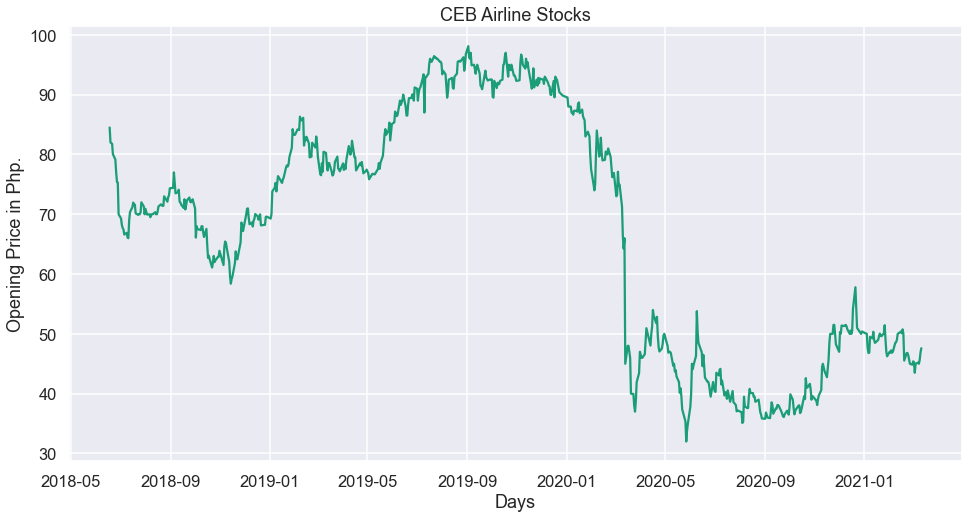

In [12]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('CEB Airline Stocks')
plt.xlabel('Days')
plt.ylabel('Opening Price in Php.')
plt.plot(cebu['Open'])
plt.show()

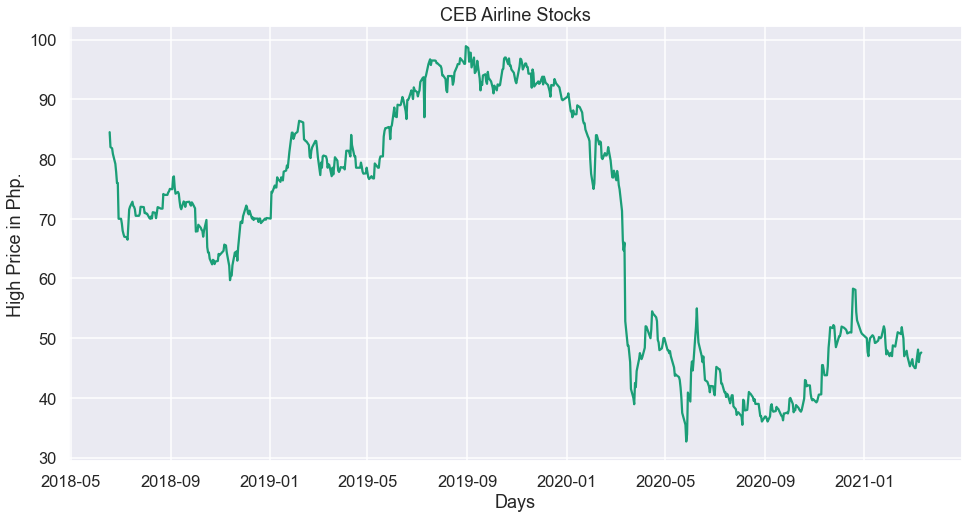

In [13]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('CEB Airline Stocks')
plt.xlabel('Days')
plt.ylabel('High Price in Php.')
plt.plot(cebu['High'])
plt.show()

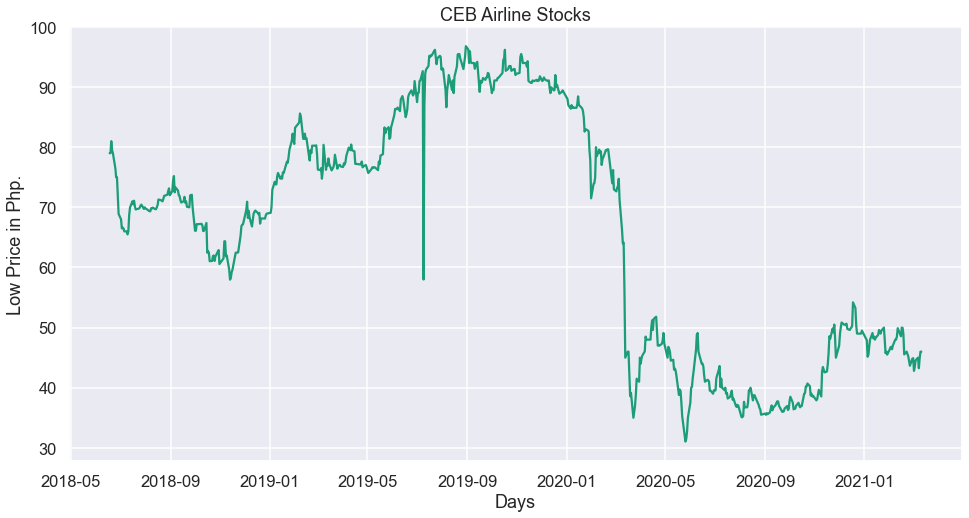

In [14]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('CEB Airline Stocks')
plt.xlabel('Days')
plt.ylabel('Low Price in Php.')
plt.plot(cebu['Low'])
plt.show()

Let us plot the last 3 years for these timeseries. We will plot the price in real time, 100-days SMA, and 20-days SMA in order to visualize how the metrics behave. Specifically, the starting date was last 18 June 2018 and ended in 12 March 2021. Then, all timeseries, the 'Price', 100-days SMA, and 20-days SMA will be plotted through ax.plot assigning its starting date to the end date to provide a range in days.

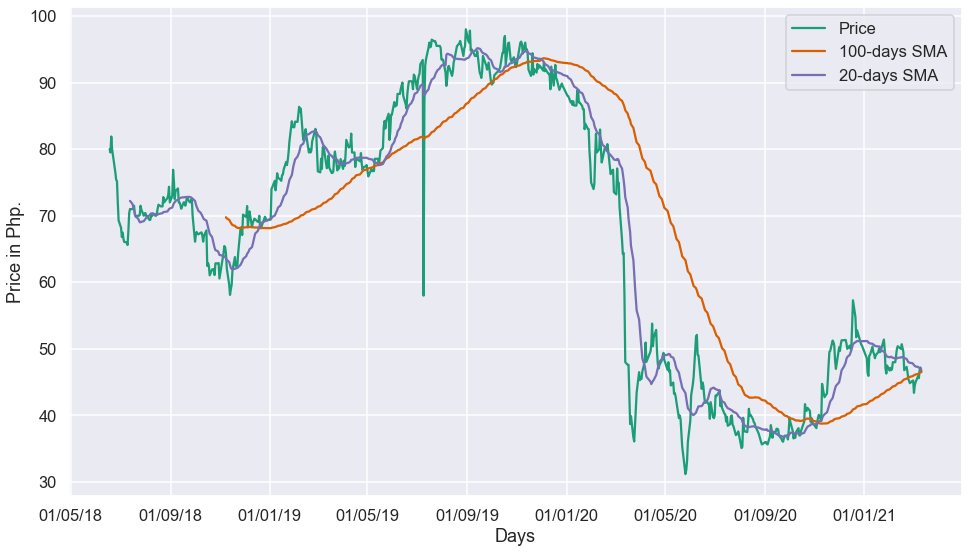

In [18]:
start_date = '18-Jun-18'
end_date = '12-Mar-21'

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(cebu.loc[start_date:end_date, :].index, cebu.loc[start_date:end_date, 'Price'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Price'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Price'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_xlabel('Days')
ax.set_ylabel('Price in Php.')
ax.xaxis.set_major_formatter(cebu_airline_datetime_format)

<h1>RESULT:</h1>

<p>As per the metric's behavior visualized above, it is straightforward to observe that using SMA Timeseries strategy in Cebu Air Inc. detects much noise on the original price than the SMA, but the delay is the most visible change in terms of 100-days SMA. This means that original price moves first followed by the moving averages, and SMA were seen with a delay (lag).

<h2>Summary and Conclusion (SMA Strategy)</h2>

<p>Datasets were loaded and cleaned successfuly, and SMA Strategy implementation has been executed by calculating the rolling average of the short-window and long-window moving average. Price factor was plotted between Open, High, and Low prices. The plot suggests a highly replicable metrics, and plotting of 100-day SMA, and 20-day SMA has been executed. Results indicates trend appearances in December 2019, June 2019, December 2020, and October 2020 where the 20-days and 100-days SMA forms like a cross-shape (X). This means that the moment a stock price reaches the trend, the slope may drastically make an uptrend or a downtrend. The perfect example is that before December 2019, stock prices were low, and during the trend, the stock price made an uptrend until June 2019. It created a trend during June 2019, and stock price continued to move upward until December 2020. After that, it made a most significant downtrend until October 2020, and in October 2020, it gained a momentum upaward until the recent day.</p>

<h1>Recommendations (SMA Strategy)</h1>
<p>New traders must: 
    <ul>
        <li>Utilize SMA timeseries strategy in order to analyze the potential, and the opportunity of Cebu Air Inc.,</li>
        <li>Observe and analyze longer timeframe to achieve better signals on the metrics,</li>
        <li>Noises occur when closing prices are closer in terms of date, and SMAs will show more visible lags. Recommended actions within noisy metrics is to avoid hard buy/sell stocks, but neutrally buy/sell stocks,</li>
        <li>Uptrends and downtrends are indications of hard buy if trend goes upward, and hard sell stocks if trend goes downward,</li>
        <li>Avoid predicting stocks through Simple Moving Average timeseries strategy. It only gauges market opportunity, buy/sell potential before betting on the stock, and</li>
        <li>Exercise extreme caution in stock trading as risks tends to go higher due to the extreme volatility of the stocks each day, and external factors like financial, regulatory or political events may occur that affects the momentum of Cebu Air Inc. stock price.</li>
        </ul>

<h1>Predicting Stocks through Multiple Regression Analysis</h1>

<p>The method of predicting CEBU Air Inc. stock price was by using Multiple Regression Analysis. In this method, we will also be looking at the changes in stock prices per day in order to determine if the change in stock goes up or down by using predict() method. For all predictive methods, we will analyze and predict 30 days of future stock prices.</p>

<p>Predicting stock prices may yield accurate findings, but it doesn't give traders an assurance that the metrics will move as we predicted. Let's keep in mind that stock trading is all about trading on uncertainties, and it requires observation and analysis as per the recommendations in SMA strategy in order to pinpoint opportunities before trading in a certain stock.</p>

In [594]:
from sklearn.linear_model import LinearRegression

In [595]:
cebu.corr()

,Price,Open,High,Low,Volume,Change
Price,1.000000,0.994969,0.996381,0.999000,-0.351866,0.057245
Open,0.994969,1.000000,0.998658,0.995923,-0.357255,-0.014940
High,0.996381,0.998658,1.000000,0.995942,-0.348105,0.006513
Low,0.999000,0.995923,0.995942,1.000000,-0.362481,0.041145
Volume,-0.351866,-0.357255,-0.348105,-0.362481,1.000000,0.087657
Change,0.057245,-0.014940,0.006513,0.041145,0.087657,1.000000


<p>After looking at the heatmap for highly corellated data, we noticed that Price, Open, High, and Low price were significantly correlated to each other to the point wherein a single omission may destroy the accuracy of future predictions.</p>

<p>All factors visualized below will be used for predicting future stock prices</p>

<AxesSubplot:>

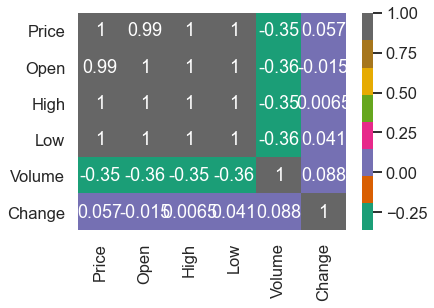

In [596]:
sns.heatmap(cebu.corr(), annot=True, cmap="Dark2")

<p>We created a new factor to make room for the predicted stocks through shift() method. By default, PredictedPrice factor will be a NaN since we need to compute for the 30-day future price.</p>

In [597]:
future_days = 30
cebu['PredictedPrice'] = cebu['Price'].shift(-future_days)
cebu.tail(10)

,Price,Open,High,Low,Volume,Change,PredictedPrice
Date,,,,,,,
2021-03-01,45.20,44.85,46.50,44.85,519600.0,0.78,NaN
2021-03-02,45.25,45.40,45.40,44.90,297200.0,0.11,NaN
2021-03-03,43.40,45.25,45.25,42.80,616000.0,-4.09,NaN
2021-03-04,44.55,43.50,45.00,43.50,222200.0,2.65,NaN
2021-03-05,45.00,45.00,45.00,44.55,229900.0,1.01,NaN
2021-03-08,45.90,45.20,48.10,45.00,666000.0,2.00,NaN
2021-03-09,45.60,45.00,46.00,43.25,300500.0,-0.65,NaN
2021-03-10,46.85,45.60,47.10,44.90,474900.0,2.74,NaN
2021-03-11,47.20,46.85,47.50,46.00,333500.0,0.75,NaN


<p>After creating the PredictedPrice factor, we will extract all variables by dropping PredictedPrice from any known x-axis, and only to be extracted towards the y-axis.</p>

In [598]:
X = np.array(cebu.drop(['PredictedPrice'], 1))[:-future_days]
print(X)

[[ 8.0000e+01  8.4500e+01  8.4500e+01  7.9000e+01  2.4562e+05 -5.3300e+00]
 [ 7.9500e+01  8.2000e+01  8.2000e+01  7.9000e+01  6.4220e+04 -6.3000e-01]
 [ 8.1900e+01  8.1900e+01  8.1900e+01  8.1000e+01  2.3080e+04  3.0200e+00]
 ...
 [ 5.1400e+01  5.0100e+01  5.2000e+01  5.0000e+01  8.2392e+05  2.5900e+00]
 [ 5.0000e+01  5.1450e+01  5.1450e+01  4.8100e+01  1.1000e+06 -2.7200e+00]
 [ 4.7050e+01  4.9050e+01  4.9050e+01  4.5750e+01  9.6073e+05 -5.9000e+00]]


In [599]:
y = np.array(cebu['PredictedPrice'])[:-future_days]
print(y)

[70.    70.35  70.4   69.95  69.95  69.35  69.4   70.    69.95  70.35
 70.    70.    70.3   71.05  71.65  71.4   71.4   72.8   72.    72.65
 73.1   74.35  72.    73.    76.9   75.2   72.5   73.7   74.1   72.
 72.    71.6   71.05  72.    72.    71.5   72.    72.8   72.1   72.
 72.1   72.6   70.    66.1   67.15  67.55  67.3   67.2   67.45  67.5
 67.    66.1   67.    67.8   62.463 62.889 62.463 61.043 61.942 61.895
 61.99  61.091 62.842 62.842 62.889 60.57  64.356 65.444 65.255 64.356
 62.132 59.624 58.11  58.961 59.624 61.753 63.788 62.463 62.463 62.51
 64.356 68.189 68.236 67.1   70.176 69.798 71.454 68.236 69.798 70.649
 68.283 68.946 69.23  69.561 69.466 69.088 69.088 69.987 68.141 68.141
 69.845 69.561 69.277 69.561 74.009 74.293 75.24  73.82  74.956 76.375
 75.713 75.429 75.24  76.091 76.186 76.943 78.079 77.606 78.363 79.498
 81.107 84.183 83.331 83.284 83.284 84.136 84.088 86.36  85.65  86.076
 81.391 82.101 82.338 83.    81.864 79.498 79.972 79.498 79.782 81.155
 83.047 82.432 79

<p>As features were now selected for our Multiple Regression Analysis, we will then make use of train_test_split in order to split the train and test sets by 80:20 ratio as it proves to be a standard, yet healthy partitioning of 3-years historical dataset, and a larger split must be observed to make emphasis on the stock trading analogy where the longer the timeframe, the more correct signals a trader will receive from the metrics.</p>

In [600]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [601]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [602]:
x_future = cebu.drop(['PredictedPrice'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[ 5.0800e+01,  5.1300e+01,  5.1300e+01,  5.0650e+01,  4.8760e+05,
        -1.0700e+00],
       [ 5.0000e+01,  5.0800e+01,  5.0800e+01,  4.9800e+01,  1.4300e+06,
        -1.5700e+00],
       [ 5.0500e+01,  5.0000e+01,  5.1000e+01,  4.9600e+01,  8.7610e+05,
         1.0000e+00],
       [ 5.0000e+01,  5.0550e+01,  5.1000e+01,  4.9850e+01,  7.9789e+05,
        -9.9000e-01],
       [ 5.0200e+01,  5.0000e+01,  5.0950e+01,  5.0000e+01,  3.3838e+05,
         4.0000e-01],
       [ 5.4000e+01,  5.0500e+01,  5.4700e+01,  5.0300e+01,  1.8700e+06,
         7.5700e+00],
       [ 5.7300e+01,  5.4200e+01,  5.8300e+01,  5.4200e+01,  2.4000e+06,
         6.1100e+00],
       [ 5.4800e+01,  5.7800e+01,  5.8100e+01,  5.3250e+01,  1.1700e+06,
        -4.3600e+00],
       [ 5.1750e+01,  5.4400e+01,  5.4400e+01,  5.0350e+01,  1.9000e+06,
        -5.5700e+00],
       [ 5.2800e+01,  5.1000e+01,  5.3000e+01,  4.9000e+01,  1.1600e+06,
         2.0300e+00],
       [ 5.0700e+01,  5.0000e+01,  5.1000e+01,  4.

As per the result of the future stock price tabulated below, the predicted values grew larger in time wherein some days almost surpassed the Php. 60.00 mark, which is hardly observed for the month of March. This information would give traders an insight that CEBU Air Inc. stock prices may have the potential to gain back the momentum that it had lost for the past three years.

In [603]:
model_prediction = model.predict(x_future)
print(model_prediction)

[52.12333668 53.2724353  51.39291961 52.14321381 51.29300907 52.02194149
 57.15203695 55.33100547 53.89716623 48.74396547 50.67217872 50.98816643
 51.10570265 47.90456273 48.22203103 48.37485338 48.93718859 49.71510362
 48.58438371 49.25440776 48.91682179 48.79433574 49.93446093 51.0790597
 51.01063253 50.11766671 50.57537832 51.30814869 49.67267026 47.50815654]


In [604]:
predictions = model_prediction 
valid = cebu[X.shape[0]:]
valid['Prediction'] = predictions

<ipython-input-604-2fda8fed0e2b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


The chart indicates the original price along with its 30-day predicted stock price. On the early predicted days, future stock prices slightly increased, and may provide a window of opportunity for traders to buy stocks. Afterwards, it went downwards closer to the value of the last original price, and it never gained momentum until the 30th day. This means that on the early 30 days, traders will most likely strong buy stocks, since if the company's stock have the most significant downtrend, traders must find a small opportunity to buy stocks if it may gain momentum before the metrics will go downward. And on the later days, a strong sell of stocks will be most logical solution for the stock traders.

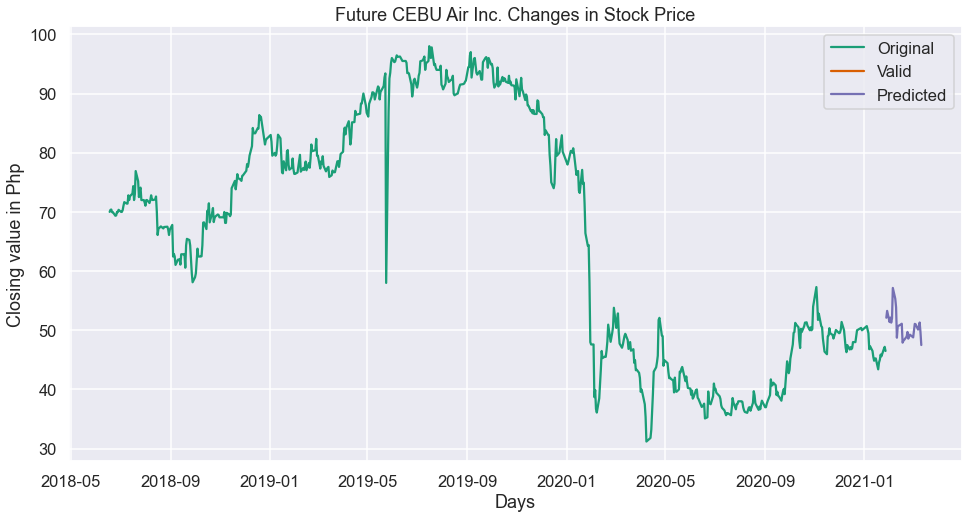

In [605]:
plt.figure(figsize=(16,8))
plt.title("Future CEBU Air Inc. Changes in Stock Price")
plt.xlabel('Days')
plt.ylabel('Closing value in Php')
plt.plot(cebu['PredictedPrice'])
plt.plot(valid[['PredictedPrice', 'Prediction']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

In [606]:
intercept = model.intercept_
print("Intercept: ",intercept)
coefficient = model.coef_
print("Coefficient: ",coefficient)

Intercept:  4.489174190435065
Coefficient:  [-1.27093867e+00  2.06600115e-01  2.04871744e-01  1.78177335e+00
  2.04169187e-06  1.42998905e-01]


As per the Train Score, the accuracy reached 78% while the Test Score reached 81%. This means that a fair precision will be the result of successfully predicting the future stock prices within 30 days. However, the price in real time may leave a large gap between the predicted price due to the stock's high volatility, and possible external issues that may visibly affect the prediction.

In [607]:
print('Train Score: ', model.score(x_train, y_train))  
print('Test Score: ', model.score(x_test, y_test))  

Train Score:  0.780699411467016
Test Score:  0.8160719086429522


<h1>Regression Equation</h1>
Price = 4.49 - 1.27(Open) + 0.20(High) + 0.20(Low) + 1.78(Volume) + 0.0000020(Change) + 0.143(PredictedPrice)

<h1>Decision Tree</h1>

<p>The method of predicting CEBU Air Inc. stock price was by using decision trees. In this method, we will also be looking at the changes in stock prices per day in order to determine if the change in stock goes up or down by determining the gini impurities. </p>

<p>Predicting stock prices may yield accurate findings, but it doesn't give traders an assurance that the metrics will move as we predicted. Let's keep in mind that stock trading is all about trading on uncertainties, and it requires observation and analysis as per the recommendations in SMA strategy in order to pinpoint opportunities before trading in a certain stock.</p>

<p>We will replicate the predicted stock prices in multiple regression by using DecisionTreeRegressor(). </p>

In [608]:
from sklearn.tree import DecisionTreeRegressor

In [609]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

<h2>30-day Stock Price Prediction with DecisionTreeRegressor</h2>

<p>This is the result after we predicted the stock price using DecisionTreeRegressor. The difference between the prediction from Multiple Regression is that the predicted stock price from Multiple Regression is significantly higher than what was predicted in the DecisionTreeRegressor. According to the original CEBU Air Inc. repository, our dataset's end date 12-March-2021 had Php. 46.500 closing price. But last 15-March 2021, closing price went down to 44, and the predicted price using trees was 46.3. This means that predictions were off by 2 points on the first day prediction. If we continue to predict for the rest of the 30 days, the result will always vary depending on how the metrics will move in the future.</p>

In [610]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[46.3  47.5  46.75 47.15 46.8  47.   48.6  48.   49.05 50.   50.4  46.75
 50.7  50.1  49.5  46.8  47.3  46.5  45.5  44.85 44.85 45.25 43.4  44.55
 45.   47.3  45.6  46.85 50.05 46.5 ]


<p>We extract our prediction factor in order to pass its value onto pyplot, and record each predicted output after the original stock price.</p>

In [611]:
predictions = tree_prediction 
valid = cebu[X.shape[0]:]
valid['Prediction'] = predictions

<ipython-input-611-dce666d0400e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = predictions


<p>As per the metrics below, the early 15 day stock price predictions gained momentum reaching approximately Php. 50, and made a downtrend on the late 15 day stock price predictions. If we look at the predicted output, the direction of each predicted output is relatively similar as to its original stock price for the last 30 days. In here, we can assert that the predicted output is dependent to the original price.</p>

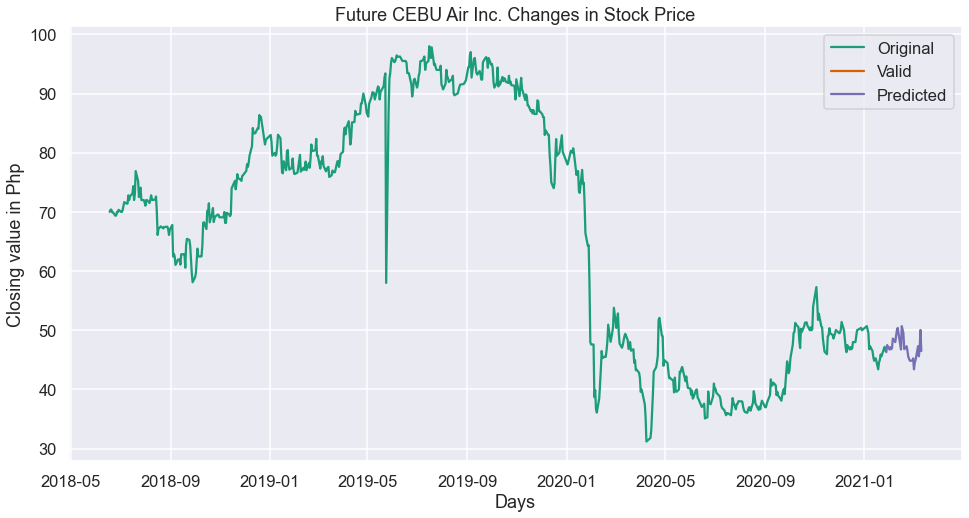

In [612]:
plt.figure(figsize=(16,8))
plt.title("Future CEBU Air Inc. Changes in Stock Price")
plt.xlabel('Days')
plt.ylabel('Closing value in Php')
plt.plot(cebu['PredictedPrice'])
plt.plot(valid[['PredictedPrice', 'Prediction']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()

Below we computed for stock returns (Return) from the starting date to the end date. We see the changes in stock returns based on the closing price given. Detailed analysis returns gave us much information on the volatilities of the stocks, which are very useful in pricing options on the stocks.

In [613]:
cebu['Return'] = cebu['Price'].pct_change(1).shift(-1)
cebu['target_cls'] = np.where(cebu.Return > 0, 1, 0)
cebu.tail()

,Price,Open,High,Low,Volume,Change,PredictedPrice,Return,target_cls
Date,,,,,,,,,
2021-03-08,45.90,45.20,48.1,45.00,666000.0,2.00,NaN,-0.006536,0
2021-03-09,45.60,45.00,46.0,43.25,300500.0,-0.65,NaN,0.027412,1
2021-03-10,46.85,45.60,47.1,44.90,474900.0,2.74,NaN,0.007471,1
2021-03-11,47.20,46.85,47.5,46.00,333500.0,0.75,NaN,-0.014831,0
2021-03-12,46.50,47.60,47.6,46.00,348200.0,-1.48,NaN,NaN,0


In [614]:
cebu

,Price,Open,High,Low,Volume,Change,PredictedPrice,Return,target_cls
Date,,,,,,,,,
2018-06-18,80.00,84.50,84.50,79.00,245620.0,-5.33,70.00,-0.006250,0
2018-06-19,79.50,82.00,82.00,79.00,64220.0,-0.63,70.35,0.030189,1
2018-06-20,81.90,81.90,81.90,81.00,23080.0,3.02,70.40,-0.023199,0
2018-06-21,80.00,81.80,81.80,79.50,121390.0,-2.32,69.95,-0.010625,0
2018-06-22,79.15,80.05,80.85,79.00,69460.0,-1.06,69.95,-0.033481,0
...,...,...,...,...,...,...,...,...,...
2021-03-08,45.90,45.20,48.10,45.00,666000.0,2.00,NaN,-0.006536,0
2021-03-09,45.60,45.00,46.00,43.25,300500.0,-0.65,NaN,0.027412,1
2021-03-10,46.85,45.60,47.10,44.90,474900.0,2.74,NaN,0.007471,1


In [615]:
cebu = cebu.drop('PredictedPrice', axis=1)
cebu = cebu.drop('Return', axis=1)
cebu

,Price,Open,High,Low,Volume,Change,target_cls
Date,,,,,,,
2018-06-18,80.00,84.50,84.50,79.00,245620.0,-5.33,0
2018-06-19,79.50,82.00,82.00,79.00,64220.0,-0.63,1
2018-06-20,81.90,81.90,81.90,81.00,23080.0,3.02,0
2018-06-21,80.00,81.80,81.80,79.50,121390.0,-2.32,0
2018-06-22,79.15,80.05,80.85,79.00,69460.0,-1.06,0
...,...,...,...,...,...,...,...
2021-03-08,45.90,45.20,48.10,45.00,666000.0,2.00,0
2021-03-09,45.60,45.00,46.00,43.25,300500.0,-0.65,1
2021-03-10,46.85,45.60,47.10,44.90,474900.0,2.74,1


<p>Features are now selected to serve as an independent variable for our Decision Tree analysis, and for our dependend variable, the targeted class(target_cls) will determine the movement of the stocks if it has moved upward or downward. A test size is set to 80:20 ratio, since we were only observing 3-years worth historical data.</p>

In [616]:
FEATURE_NAMES = ['Price', 'Open', 'High', 'Low', 'Volume', 'Change']

In [617]:
X = cebu.drop('target_cls', axis = 1).values
Y = cebu['target_cls'].values

<p>In relation to Multiple Regression Analysis, we will still make use of train_test_split in Decision Trees to split the train and test sets by 80:20 ratio as it proves to be a standard, yet healthy partitioning of 3-years historical dataset, and a larger split must be observed to make emphasis on the stock trading analogy where the longer the timeframe, the more correct signals a trader will receive from the metrics.</p>

In [618]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20, random_state=1)
classifier = DecisionTreeClassifier(criterion="gini", max_depth=5)
classifier.fit(X, Y)

DecisionTreeClassifier(max_depth=5)

In [619]:
from sklearn.tree import export_graphviz
export_graphviz(classifier, 'tree.dot', feature_names = FEATURE_NAMES)

In [620]:
! dot -Tpng tree.dot -o tree.png

An initial visualization of Decision Trees asserts that the High price factor will be on the root node. This mau assert that the historical data had high prices which is an opportunity for the traders on the specific timeframe to buy stocks, a missing value may give the tree an inaccurate result. In order to detect missing values, one must locate the missing values in every column, and replace them with the average value of the specific column, an optimal solution for filling missing data in stock trade that will serve as a default in an event of missing values.

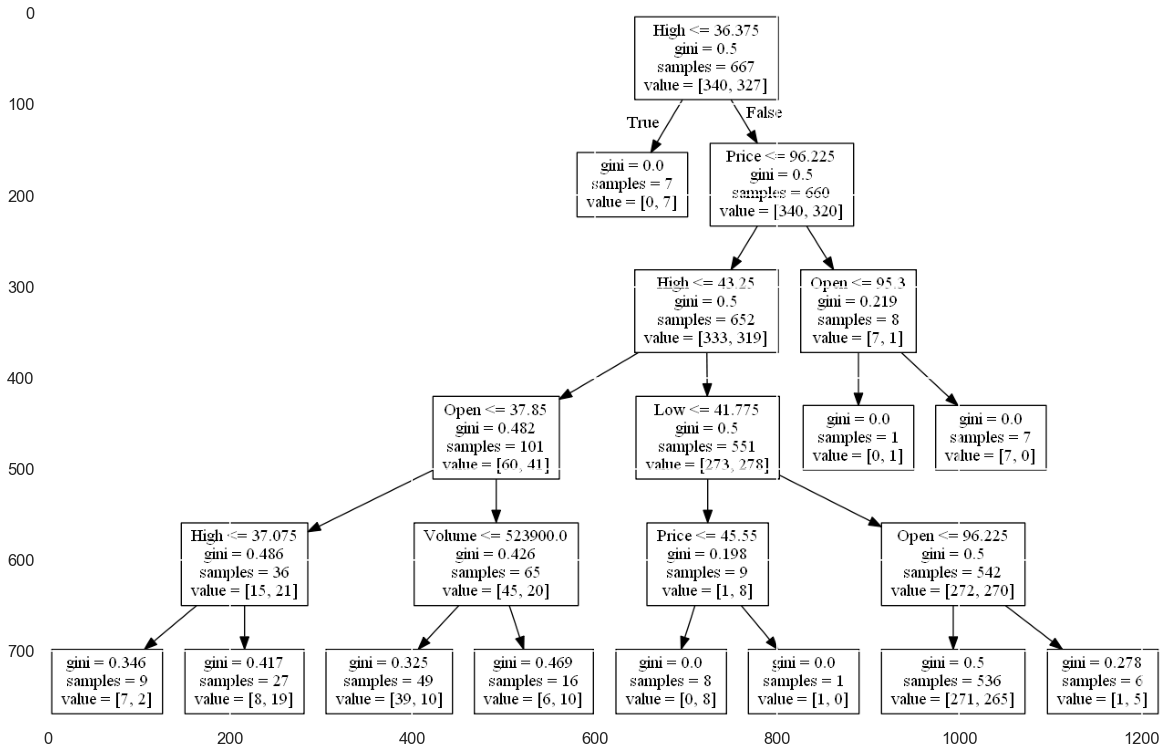

In [621]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20,20))
plt.imshow(img)

There were 35 missing values in the Change in price factor. This may occur after computing for stock returns and predicted price in order to create a target class as a deciding factor when will the stock price go up or down. The viable solution for missing values will be by imputing them, and replacing it with the average values of the Change in price factor.

In [524]:
print('total rows:{0}'.format(len(cebu)))

for col in cebu.iloc[:,1:-1]:
    print('Missing Values: ',col,':',len(cebu.loc[cebu[col]==0]))

total rows:667
Missing Values:  Open : 0
Missing Values:  High : 0
Missing Values:  Low : 0
Missing Values:  Volume : 0
Missing Values:  Change : 35


In [525]:
cebu_imp=cebu.iloc[:,1:-1]
cebu_imp

,Open,High,Low,Volume,Change
Date,,,,,
2018-06-18,84.50,84.50,79.00,245620.0,-5.33
2018-06-19,82.00,82.00,79.00,64220.0,-0.63
2018-06-20,81.90,81.90,81.00,23080.0,3.02
2018-06-21,81.80,81.80,79.50,121390.0,-2.32
2018-06-22,80.05,80.85,79.00,69460.0,-1.06
...,...,...,...,...,...
2021-03-08,45.20,48.10,45.00,666000.0,2.00
2021-03-09,45.00,46.00,43.25,300500.0,-0.65
2021-03-10,45.60,47.10,44.90,474900.0,2.74


In [526]:
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=0, strategy="mean")
imr = imr.fit(cebu_imp.values)
cebu = imr.transform(cebu_imp)
cebu.shape

(667, 5)

It is evident in the figure that the Lowest Price has the highest significance among all of the variables after . A Lowest Price of less than 36.375 signifies a down movement of the value of the stocks. It is then followed by the Opening Price, the Highest Price, the Volume of the Stocks and the Percent of Change. 

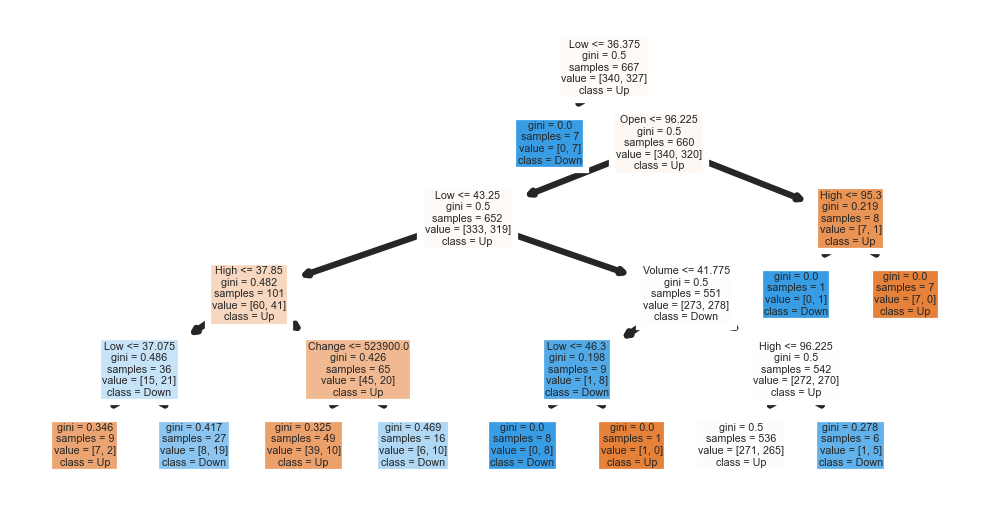

In [531]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,2), dpi=300)

tree.plot_tree(classifier,
               feature_names = cebu_imp.columns, 
               class_names=['Up', 'Down'],
               filled = True)
fig.savefig('stocktree.png')

In [532]:
y_pred=classifier.predict(X_test)

In [533]:
from sklearn.metrics import classification_report, confusion_matrix

In [537]:
print('Report: ',classification_report(Y_test, y_pred))

Report:                precision    recall  f1-score   support

           0       0.57      0.97      0.72        73
           1       0.78      0.11      0.20        61

    accuracy                           0.58       134
   macro avg       0.67      0.54      0.46       134
weighted avg       0.66      0.58      0.48       134



In [539]:
print('Accuracy:',metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.582089552238806


In [540]:
print('Confusion Matrix:', confusion_matrix(Y_test, y_pred))

Confusion Matrix: [[71  2]
 [54  7]]


The model can precisely predict a up movement by 57% while 78% if down. And 97% can find the true positive while 11%of the true negative. All in all, the model has an accuracy 58% which is halfway of helping investors in deciding when to buy and sell stocks.

<h2>Summary and Conclusion (Multiple Regression and Decision Tree)</h2>

<p>Both Multiple Regression and Decision Tree were executed in order to predict the stock prices, but Decision Tree also provided appropriate factors to anticipate a buy/sell action. As per the accuracy given in both analysis, Multiple Regression have the high score of 78% compared to its counterpart, the Decision Tree with the score of 58%. This means that in predicting future stock prices in Cebu Air Inc., Multiple Regression may be the efficient analysis. Because predicting through Decision Tree only explained half of its variability, and out of 134 samples reported in the confusion matrix of the decision tree, there are actually 54 observations that have Type II Error where the observations were truly inaccurate.</p>

<h1>Recommendations</h1>
    <ul>
        <li>Before predicting future stock prices, analyze its SMA Time Series Strategy to look for opportunities in buy/sell of stocks,</li>
    <li>Refrain from being dependent on future predictions alone. Stock trading is a platform of uncertainty where factors may not be measurable through continuous data alone, and</li>
        <li>Exercise extreme caution in stock trading as risks tends to go higher due to the extreme volatility of the stocks each day, and external factors like financial, regulatory or political events may occur that affects the momentum of Cebu Air Inc. stock price.</li>